In [1]:
import os
import pandas

dir_path = './Data_RNN'

df = pandas.DataFrame()
    
for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)
    if not os.path.isdir(file_path):
        ext = os.path.splitext(file_path)[-1]
        if ext == '.txt': 
            print(file_path)
            
            curr_df = pandas.read_csv(file_path, delim_whitespace=True, header=None, usecols=[6])
            df = df.append(curr_df)

./Data_RNN/201301.txt
./Data_RNN/201302.txt
./Data_RNN/201306.txt
./Data_RNN/201307.txt
./Data_RNN/201401.txt
./Data_RNN/201402.txt
./Data_RNN/201403.txt
./Data_RNN/201405.txt
./Data_RNN/201406.txt
./Data_RNN/201503.txt
./Data_RNN/201601.txt


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

dataset = df.values
dataset = dataset.astype('float32')
dataset = np.log10(dataset)

# normalize
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = np.reshape(dataset, (11, 288, 1))

#dataset.shape

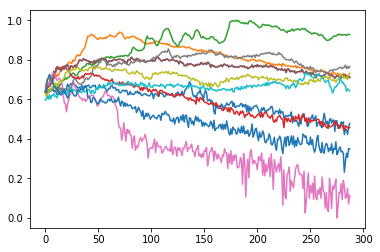

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

for ds in dataset:
    plt.plot(ds)
    
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(512, batch_input_shape=(1, 1, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512, batch_input_shape=(1, 1, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

#model = Sequential()
#model.add(LSTM(100, batch_input_shape=(1, 20, 1), stateful=True))
#model.add(Dropout(0.3))
#model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

Using Theano backend.


In [ ]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        dataX.append(dataset[i, 0])
        dataY.append(dataset[i + 1, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
for epoch in range(100):
    
    for event_idx in range(10):
    
        print('epoch : ' + str(epoch) + ' | event id : ' + str(event_idx))
        
        trainX, trainY = create_dataset(dataset[event_idx])
        
        trainX = np.reshape(trainX, (trainX.shape[0], 1, 1)) # samples, time steps, features

        model.fit(trainX, trainY, nb_epoch=1, batch_size=1, verbose=2, shuffle=False)
        model.reset_states()

epoch : 0 | event id : 0
Epoch 1/1
12s - loss: 0.0523
epoch : 0 | event id : 1
Epoch 1/1
12s - loss: 0.0127
epoch : 0 | event id : 2
Epoch 1/1
12s - loss: 0.0058
epoch : 0 | event id : 3
Epoch 1/1
11s - loss: 0.0018
epoch : 0 | event id : 4
Epoch 1/1
12s - loss: 0.0031
epoch : 0 | event id : 5
Epoch 1/1
11s - loss: 0.0014
epoch : 0 | event id : 6
Epoch 1/1
12s - loss: 0.0037
epoch : 0 | event id : 7
Epoch 1/1
12s - loss: 0.0077
epoch : 0 | event id : 8
Epoch 1/1
12s - loss: 0.0017
epoch : 0 | event id : 9
Epoch 1/1
11s - loss: 0.0014
epoch : 1 | event id : 0
Epoch 1/1
12s - loss: 0.0011
epoch : 1 | event id : 1
Epoch 1/1
12s - loss: 0.0032
epoch : 1 | event id : 2
Epoch 1/1
11s - loss: 0.0036
epoch : 1 | event id : 3
Epoch 1/1
11s - loss: 0.0020
epoch : 1 | event id : 4
Epoch 1/1
12s - loss: 0.0035
epoch : 1 | event id : 5
Epoch 1/1
12s - loss: 0.0011
epoch : 1 | event id : 6
Epoch 1/1
12s - loss: 0.0031
epoch : 1 | event id : 7
Epoch 1/1
11s - loss: 0.0093
epoch : 1 | event id : 8
Epo

In [ ]:
testX, testY = create_dataset(dataset[10])

seq_in = testX[0]
seq_in = np.reshape(seq_in, (1, 1, 1))

In [ ]:
look_ahead = 287

predictions = np.zeros((look_ahead, 1))
    
for i in range(look_ahead):
    prediction = model.predict(seq_in, batch_size=1, verbose=0)
    predictions[i] = prediction
    seq_in = np.reshape(prediction, (1, 1, 1))
    
model.reset_states()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions,'r', label="prediction")
plt.plot(np.arange(look_ahead), testY, label="test function")
plt.legend()
plt.show()

In [ ]:
testX, testY = create_dataset(dataset[10])

seq_in = testX[0]
seq_in = np.reshape(seq_in, (1, 1, 1))

look_real = 100
look_ahead = 287 - look_real

predictions = np.zeros((look_real + look_ahead, 1))
    
for i in range(look_real):
    prediction = model.predict(seq_in, batch_size=1, verbose=0)
    predictions[i] = prediction
    seq_in = np.reshape(testX[i+1], (1, 1, 1))
    
for i in range(look_ahead):
    prediction = model.predict(seq_in, batch_size=1, verbose=0)
    predictions[look_real + i] = prediction
    seq_in = np.reshape(prediction, (1, 1, 1))
    
model.reset_states()  

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_real + look_ahead), predictions,'r', label="prediction")
plt.plot(np.arange(look_real + look_ahead), testY, label="test function")
plt.legend()
plt.show()